### Terminal commands:

Created new directory and transferred the following files using “cp”:

-   `$mkdir week4`
-	 mm10_refseq_genes_chr6_50M_60M.bed
-	 methylation_fastq.tar.gz
-	 chr6.fa.gz
 
Determine which file belongs to which sample using GEO:

-	926 file = E4.0 sample
-	929 file = E5.5 sample

Create an index folder and move chr6.fa.gz into it:

-   `$./week4/mkdir index`
-   `$./week4/ mv chr6.fa.gz ./week4/index/chr6.fa.gz`

Unpack fastq files:

-   `$tar xzf methylation_fastq.tar.gz`

Does anything stand out? Can you explain why you’re seeing anything unusual?


Bisulfite mapping with Bismark

Create index for mapping the genome:

-   `$bismark_genome_preparation index`

Map two experiments separately to the genome using bismark:

-   `$bismark index -1 SRR3083926_1.chr6.fastq -2 SRR3083926_2.chr6.fastq -o output -B 926`
-   `$bismark index -1 SRR3083929_1.chr6.fastq -2 SRR3083929_2.chr6.fastq -o output -B 929`

Use deduplicate_bismark to remove duplicate reads:

-   `$deduplicate_bismark 926_pe.bam`
-   `$deduplicate_bismark 929_pe.bam`

Create sorted BAM files:

-   `$samtools sort -n 926_pe.deduplicated.bam -o 926sort.bam`
-   `$samtools sort -n 929_pe.deduplicated.bam -o 929sort.bam`
	
Index sorted BAM files:

-   `$samtools index 929sort.bam`
-   `$samtools index 926sort.bam`

Use bismark_methylation_extractor to extract methylation data:

-   `$bismark_methylation_extractor --bedgraph --comprehensive 926sort.bam`
-   `$bismark_methylation_extractor --bedgraph --comprehensive 929sort.bam`

Visualize bedgraph file and reads using IGV

-   `$IGV 926sort.bam 926sort.bedGraph.gz`
-   `$IGV 929sort.bam 929sort.bedGraph.gz`


Analysis

Extract promoters, write them to a bed file and remove duplicates:

-   `$awk 'BEGIN{OFS="\t"}{if ($4 == "+") print $3,$5 - 2000,$5,$13,$12,$4; else print $3,$6,$6 + 2000,$13,$12,$4;}'  mm10_refseq_genes_chr6_50M_60M.bed | grep -v Rik | uniq -f 3 | sort k2,2n > promoters.bed`


Intersect BAMs with promoter BEDs:

-   `$bedtools map -a promoters.bed -b 926sort.bedGraph.gz -c 4 -o sum > btmap926`
-   `$bedtools map -a promoters.bed -b 929sort.bedGraph.gz -c 4 -o sum > btmap929`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
btmap926 = pd.read_csv("btmap926", delim_whitespace=True, header=None, names = ['chrom', 'start', 'end', 'promoter', '4', '5', 'sum'])
btmap926

,chrom,start,end,promoter,4,5,sum
0,chr6,50108240,50110240,Mpp6,0,+,0
1,chr6,50261769,50263769,Dfna5,0,-,0
2,chr6,50382837,50384837,Osbpl3,0,-,0
3,chr6,50566474,50568474,Cycs,0,-,133.3333333
4,chr6,50570397,50572397,Mir6371,0,+,700
...,...,...,...,...,...,...,...
102,chr6,58831699,58833699,Herc3,0,+,0
103,chr6,58907126,58909126,Nap1l5,0,-,866.6666667
104,chr6,59024502,59026502,Fam13a,0,-,0
105,chr6,59206869,59208869,Tigd2,0,+,100


In [3]:
btmap926 = btmap926.replace(['.'],'0')
btmap926

,chrom,start,end,promoter,4,5,sum
0,chr6,50108240,50110240,Mpp6,0,+,0
1,chr6,50261769,50263769,Dfna5,0,-,0
2,chr6,50382837,50384837,Osbpl3,0,-,0
3,chr6,50566474,50568474,Cycs,0,-,133.3333333
4,chr6,50570397,50572397,Mir6371,0,+,700
...,...,...,...,...,...,...,...
102,chr6,58831699,58833699,Herc3,0,+,0
103,chr6,58907126,58909126,Nap1l5,0,-,866.6666667
104,chr6,59024502,59026502,Fam13a,0,-,0
105,chr6,59206869,59208869,Tigd2,0,+,100


In [4]:
hist926 = btmap926["sum"]

In [5]:
hist926df = pd.DataFrame(hist926)
hist926df

,sum
0,0
1,0
2,0
3,133.3333333
4,700
...,...
102,0
103,866.6666667
104,0
105,100


In [6]:
import matplotlib.pyplot as plt
import numpy as np

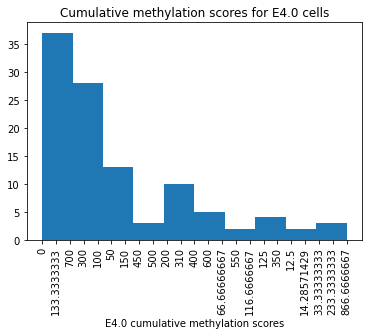

In [7]:
fig, ax = plt.subplots()
plt.title("Cumulative methylation scores for E4.0 cells")
plt.xlabel("E4.0 cumulative methylation scores")
plt.xticks(rotation=90)
ax.hist(x = hist926df['sum'])
plt.show()

In [8]:
btmap929 = pd.read_csv("btmap929", delim_whitespace=True, header=None, names = ['chrom', 'start', 'end', 'promoter', '4', '5', 'sum'])
btmap929

,chrom,start,end,promoter,4,5,sum
0,chr6,50108240,50110240,Mpp6,0,+,100.000000
1,chr6,50261769,50263769,Dfna5,0,-,950.000000
2,chr6,50382837,50384837,Osbpl3,0,-,1650.000000
3,chr6,50566474,50568474,Cycs,0,-,650.000000
4,chr6,50570397,50572397,Mir6371,0,+,1916.666667
...,...,...,...,...,...,...,...
102,chr6,58831699,58833699,Herc3,0,+,850.000000
103,chr6,58907126,58909126,Nap1l5,0,-,800.000000
104,chr6,59024502,59026502,Fam13a,0,-,750.000000
105,chr6,59206869,59208869,Tigd2,0,+,950.000000


In [9]:
btmap929 = btmap929.replace(['.'],'0')
btmap929

,chrom,start,end,promoter,4,5,sum
0,chr6,50108240,50110240,Mpp6,0,+,100.000000
1,chr6,50261769,50263769,Dfna5,0,-,950.000000
2,chr6,50382837,50384837,Osbpl3,0,-,1650.000000
3,chr6,50566474,50568474,Cycs,0,-,650.000000
4,chr6,50570397,50572397,Mir6371,0,+,1916.666667
...,...,...,...,...,...,...,...
102,chr6,58831699,58833699,Herc3,0,+,850.000000
103,chr6,58907126,58909126,Nap1l5,0,-,800.000000
104,chr6,59024502,59026502,Fam13a,0,-,750.000000
105,chr6,59206869,59208869,Tigd2,0,+,950.000000


In [10]:
hist929 = btmap929["sum"]

In [11]:
hist929df = pd.DataFrame(hist929)
hist929df

,sum
0,100.000000
1,950.000000
2,1650.000000
3,650.000000
4,1916.666667
...,...
102,850.000000
103,800.000000
104,750.000000
105,950.000000


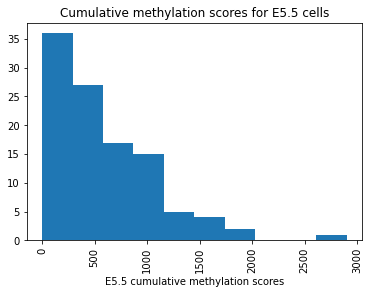

In [12]:
fig, ax = plt.subplots()
plt.title("Cumulative methylation scores for E5.5 cells")
plt.xlabel("E5.5 cumulative methylation scores")
plt.xticks(rotation=90)
ax.hist(x = hist929df['sum'])
plt.show()

In [13]:
btmap929 = pd.read_csv("btmap929", delim_whitespace=True, names = ['chrom', 'start', 'end', 'promoter', '4', '5', 'sum'])
btmap929

,chrom,start,end,promoter,4,5,sum
0,chr6,50108240,50110240,Mpp6,0,+,100.000000
1,chr6,50261769,50263769,Dfna5,0,-,950.000000
2,chr6,50382837,50384837,Osbpl3,0,-,1650.000000
3,chr6,50566474,50568474,Cycs,0,-,650.000000
4,chr6,50570397,50572397,Mir6371,0,+,1916.666667
...,...,...,...,...,...,...,...
102,chr6,58831699,58833699,Herc3,0,+,850.000000
103,chr6,58907126,58909126,Nap1l5,0,-,800.000000
104,chr6,59024502,59026502,Fam13a,0,-,750.000000
105,chr6,59206869,59208869,Tigd2,0,+,950.000000


In [14]:
scat929 = btmap929[["promoter","sum"]]
scat929

,promoter,sum
0,Mpp6,100.000000
1,Dfna5,950.000000
2,Osbpl3,1650.000000
3,Cycs,650.000000
4,Mir6371,1916.666667
...,...,...
102,Herc3,850.000000
103,Nap1l5,800.000000
104,Fam13a,750.000000
105,Tigd2,950.000000


In [15]:
scat926 = btmap926[["promoter","sum"]]
scat926

,promoter,sum
0,Mpp6,0
1,Dfna5,0
2,Osbpl3,0
3,Cycs,133.3333333
4,Mir6371,700
...,...,...
102,Herc3,0
103,Nap1l5,866.6666667
104,Fam13a,0
105,Tigd2,100


In [16]:
merged = pd.merge(scat926, scat929, on='promoter')
merged['sum_x'] = pd.to_numeric(merged['sum_x'])
merged['sum_y'] = pd.to_numeric(merged['sum_y'])
merged

,promoter,sum_x,sum_y
0,Mpp6,0.000000,100.000000
1,Dfna5,0.000000,950.000000
2,Osbpl3,0.000000,1650.000000
3,Cycs,133.333333,650.000000
4,Mir6371,700.000000,1916.666667
...,...,...,...
102,Herc3,0.000000,850.000000
103,Nap1l5,866.666667,800.000000
104,Fam13a,0.000000,750.000000
105,Tigd2,100.000000,950.000000


In [17]:
E4E5hox = merged.loc[merged['promoter'].str.contains("hox", case=False)]
E4E5hox

,promoter,sum_x,sum_y
15,Hoxa1,100.0,0.000000
16,Hoxaas2,0.0,0.000000
17,Hoxa2,100.0,0.000000
18,Hoxa4,0.0,750.000000
19,Hoxaas3,450.0,450.000000
20,Hoxa5,100.0,283.333333
21,Hoxa6,100.0,500.000000
22,Hoxa3,500.0,183.333333
24,Hoxa7,310.0,266.666667
25,Hoxa9,400.0,0.000000


In [18]:
x = merged['sum_x']
y = merged['sum_y']
xhox = E4E5hox['sum_x']
yhox = E4E5hox['sum_y']

In [19]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

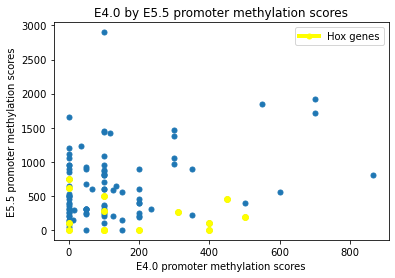

In [20]:
fig, ax = plt.subplots()
plt.title("E4.0 by E5.5 promoter methylation scores")
plt.xlabel("E4.0 promoter methylation scores")
plt.ylabel("E5.5 promoter methylation scores")
plt.scatter(x, y, s=25)
plt.scatter(xhox, yhox, color="yellow")

legend_elements = [Line2D([0], [0], marker = 'o', color="yellow", lw=4, label='Hox genes', markerfacecolor="yellow", markersize=5)]
plt.legend(handles=legend_elements, loc='upper right')
plt.show()

In [21]:
E4 = merged[['promoter', 'sum_x']]
E4

,promoter,sum_x
0,Mpp6,0.000000
1,Dfna5,0.000000
2,Osbpl3,0.000000
3,Cycs,133.333333
4,Mir6371,700.000000
...,...,...
102,Herc3,0.000000
103,Nap1l5,866.666667
104,Fam13a,0.000000
105,Tigd2,100.000000


In [22]:
E4hox = E4.loc[E4['promoter'].str.contains("hox", case=False)]
E4hox

,promoter,sum_x
15,Hoxa1,100.0
16,Hoxaas2,0.0
17,Hoxa2,100.0
18,Hoxa4,0.0
19,Hoxaas3,450.0
20,Hoxa5,100.0
21,Hoxa6,100.0
22,Hoxa3,500.0
24,Hoxa7,310.0
25,Hoxa9,400.0


In [23]:
E4nohox = E4.loc[~E4['promoter'].str.contains("hox", case=False)]
E4nohox

,promoter,sum_x
0,Mpp6,0.000000
1,Dfna5,0.000000
2,Osbpl3,0.000000
3,Cycs,133.333333
4,Mir6371,700.000000
...,...,...
102,Herc3,0.000000
103,Nap1l5,866.666667
104,Fam13a,0.000000
105,Tigd2,100.000000


In [24]:
print(type(E4nohox))

<class 'pandas.core.frame.DataFrame'>


In [25]:
E4nohox[E4nohox['sum_x'].apply(lambda x: isinstance(x, (float, np.int64)))]

,promoter,sum_x
0,Mpp6,0.000000
1,Dfna5,0.000000
2,Osbpl3,0.000000
3,Cycs,133.333333
4,Mir6371,700.000000
...,...,...
102,Herc3,0.000000
103,Nap1l5,866.666667
104,Fam13a,0.000000
105,Tigd2,100.000000


In [30]:
E4nohoxvals = E4nohox["sum_x"]
E4nohoxvals

0        0.000000
1        0.000000
2        0.000000
3      133.333333
4      700.000000
          ...    
102      0.000000
103    866.666667
104      0.000000
105    100.000000
106      0.000000
Name: sum_x, Length: 93, dtype: float64

In [26]:
E4hox[E4hox['sum_x'].apply(lambda x: isinstance(x, (float, np.int64)))]

,promoter,sum_x
15,Hoxa1,100.0
16,Hoxaas2,0.0
17,Hoxa2,100.0
18,Hoxa4,0.0
19,Hoxaas3,450.0
20,Hoxa5,100.0
21,Hoxa6,100.0
22,Hoxa3,500.0
24,Hoxa7,310.0
25,Hoxa9,400.0


In [29]:
E4hoxvals = E4hox['sum_x']
E4hoxvals

15    100.0
16      0.0
17    100.0
18      0.0
19    450.0
20    100.0
21    100.0
22    500.0
24    310.0
25    400.0
27      0.0
28    200.0
29      0.0
31    400.0
Name: sum_x, dtype: float64

In [27]:
import scipy as sc
from scipy import stats

In [31]:
sc.stats.ttest_ind(E4hoxvals, E4nohoxvals)

Ttest_indResult(statistic=1.312084775305018, pvalue=0.1923527803105489)

### There are not significant differences between hox and non-hox methylation scores in E4.0 cells (p = 0.192)

In [32]:
E5 = merged[['promoter', 'sum_y']]
E5

,promoter,sum_y
0,Mpp6,100.000000
1,Dfna5,950.000000
2,Osbpl3,1650.000000
3,Cycs,650.000000
4,Mir6371,1916.666667
...,...,...
102,Herc3,850.000000
103,Nap1l5,800.000000
104,Fam13a,750.000000
105,Tigd2,950.000000


In [33]:
E5hox = E5.loc[E5['promoter'].str.contains("hox", case=False)]
E5hox

,promoter,sum_y
15,Hoxa1,0.000000
16,Hoxaas2,0.000000
17,Hoxa2,0.000000
18,Hoxa4,750.000000
19,Hoxaas3,450.000000
20,Hoxa5,283.333333
21,Hoxa6,500.000000
22,Hoxa3,183.333333
24,Hoxa7,266.666667
25,Hoxa9,0.000000


In [34]:
E5nohox = E5.loc[~E5['promoter'].str.contains("hox", case=False)]
E5nohox

,promoter,sum_y
0,Mpp6,100.000000
1,Dfna5,950.000000
2,Osbpl3,1650.000000
3,Cycs,650.000000
4,Mir6371,1916.666667
...,...,...
102,Herc3,850.000000
103,Nap1l5,800.000000
104,Fam13a,750.000000
105,Tigd2,950.000000


In [35]:
E5nohox[E5nohox['sum_y'].apply(lambda x: isinstance(x, (float, np.int64)))]

,promoter,sum_y
0,Mpp6,100.000000
1,Dfna5,950.000000
2,Osbpl3,1650.000000
3,Cycs,650.000000
4,Mir6371,1916.666667
...,...,...
102,Herc3,850.000000
103,Nap1l5,800.000000
104,Fam13a,750.000000
105,Tigd2,950.000000


In [39]:
E5nohoxvals = E5nohox["sum_y"]

In [36]:
E5hox[E5hox['sum_y'].apply(lambda x: isinstance(x, (float, np.int64)))]

,promoter,sum_y
15,Hoxa1,0.000000
16,Hoxaas2,0.000000
17,Hoxa2,0.000000
18,Hoxa4,750.000000
19,Hoxaas3,450.000000
20,Hoxa5,283.333333
21,Hoxa6,500.000000
22,Hoxa3,183.333333
24,Hoxa7,266.666667
25,Hoxa9,0.000000


In [40]:
E5hoxvals = E5hox["sum_y"]

In [43]:
sc.stats.ttest_ind(E5hoxvals, E5nohoxvals)

Ttest_indResult(statistic=-2.8618380769825458, pvalue=0.0050844215499579294)

### There are significant differences between hox and non-hox methylation scores in E5.5 cells (p = 0.005)